# Histogram 
* reference:(https://zhuanlan.zhihu.com/p/147010174)
* histogram:  
   * ``` cv2.calcHist(images,channels,mask,histSize,ranges[, hist[, accumulate]])```
     > * images: original image（image fomart uint8 / float32）.
     > * channels: It also needs to be enclosed in brackets. If the input image is a grayscale image, its value is [0]; If it is a color image, the incoming parameters can be [0], [1], [2], which correspond to channels B, G, and R.
     > * mask: mask. To count the histogram of the whole image, set it to None.
     > * histSize: The number of BINs, which also requires brackets. (For the meaning of BINS here, see [cv2. calcHist]（ https://blog.csdn.net/star_sky_sc/article/details/122371392 )）
     > * ranges: range of pixel values, usually [0,255]. 
* Numpy statistics histogram: 
    * ``` np.histogram (array, bins=10, range=None, weights=None, density=False)```
     > *  When making statistics on image histograms, array=img. flatten() or img. travel()  -- to pull array dimensions into a one-dimensional array

* Draw histogram:
   * ``` plt. hist( )``` 

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

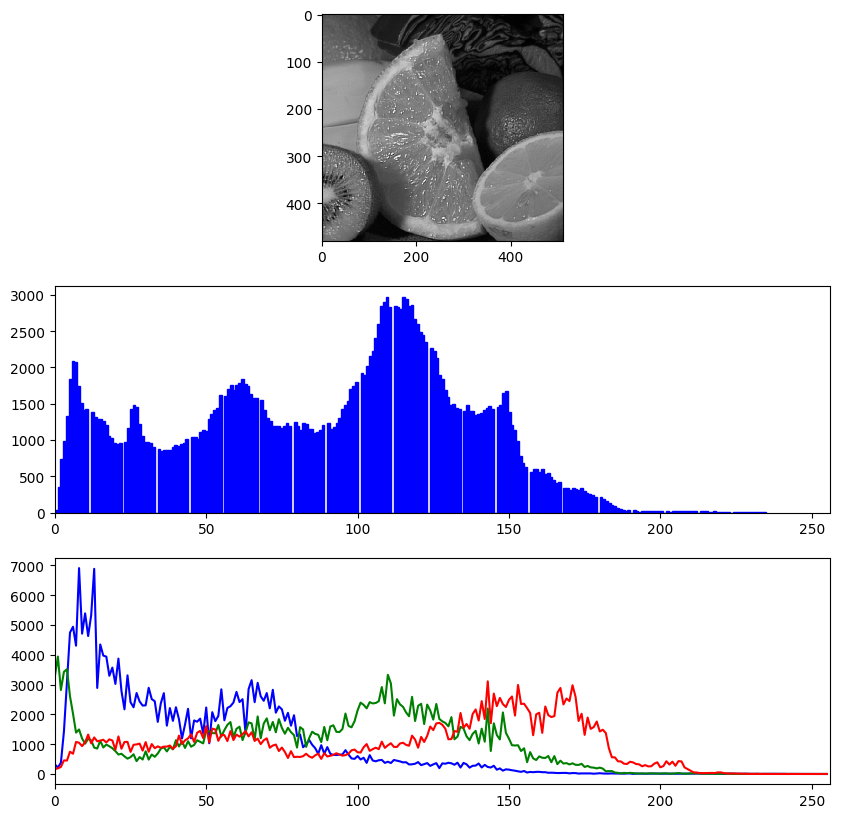

In [7]:
# no mask
# Here 0 means reading in grayscale image
img = cv2.imread("data/fruits.bmp",0)
# print(img.shape)
# img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(3,1,1)
plt.imshow(img,"gray")
# Hist is a 256 * 1 matrix, and each value represents the number of pixels corresponding to each gray value
hist = cv2.calcHist([img],[0],None,[256],[0,256])
# print(type(hist))
plt.subplot(3,1,2)
# drawing function 'hist' in matplotlib
plt.hist(img.flatten(),bins=256,facecolor='blue',edgecolor='blue')
# plt.plot(hist)
plt.xlim([0,256])
#Display pixel statistics of three channels
img_bgr=cv2.imread("data/fruits.bmp")
plt.subplot(3,1,3)
color=('b','g','r')
for i,col in enumerate(color):
    hist1=cv2.calcHist([img_bgr],[i],None,[256],[0,256])  #(图片,channel,None,x轴,y轴)
    plt.plot(hist1,color=col)
    plt.xlim([0,256])

(0, 256)

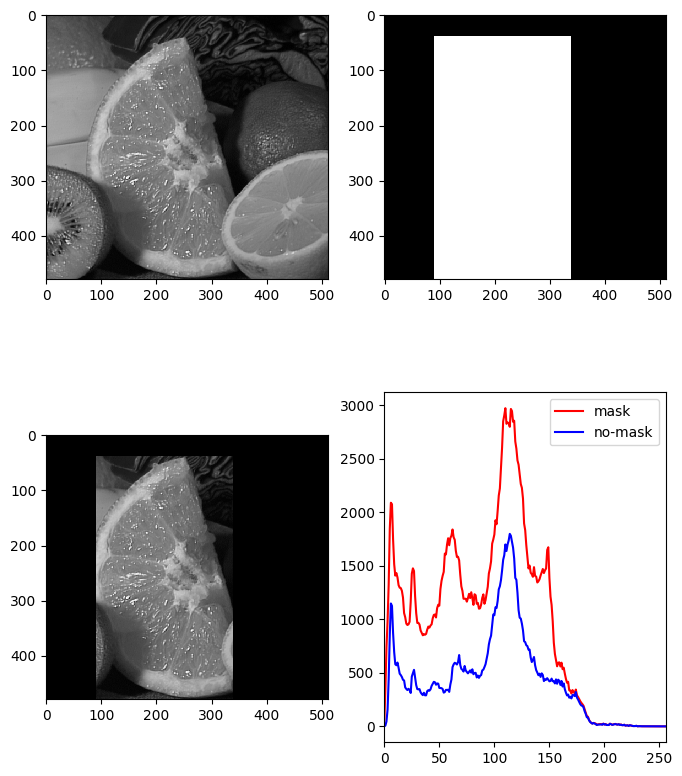

In [8]:
# mask
import numpy as np
img=cv2.imread("data/fruits.bmp",0)
mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[40:500, 90:340] = 255    # [留白区域]
masked_img = cv2.bitwise_and(img, mask)#与操作
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])
plt.figure(figsize=(8,10))

plt.subplot(2,2,1)
plt.imshow(img, 'gray')

plt.subplot(2,2,2) 
plt.imshow(mask, 'gray')

plt.subplot(2,2,3) 
plt.imshow(masked_img, 'gray')

plt.subplot(2,2,4)
plt.plot(hist_full,color='r')
plt.plot(hist_mask,color='b')
plt.legend(["mask","no-mask"])
plt.xlim([0, 256])


## Histogram normalization(直方图归一化)

*  'density' is true or false, it indicates whether to normalize（'density'为真或假，表示是否规范化）

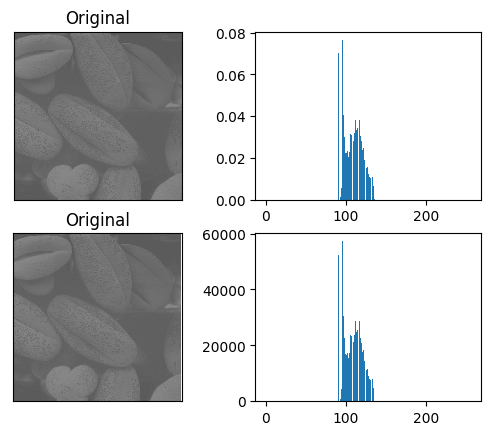

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img  = cv2.imread("data/pollen-lowcontrast.tif")

# Display histogram
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.hist(img.ravel(), bins=256, range=(0, 255),density=True)

plt.subplot(2,2,3)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])·

plt.subplot(2,2,4)
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.show()

## Histogram equalization（直方图均衡化）
* Histogram reflects the clarity of the image. Generally, when the histogram is evenly distributed, the image is clearest.

* Histogram equalization:
  * Histogram equalization is a method to adjust the image contrast based on image histogram. This method is usually used to increase the global contrast of an image.
  * ``` cv2.equalizeHist(img)```
* Adaptive histogram equalization:
  * The global histogram equalization also has some problems. Due to the improvement of the overall brightness, the details of the local image will become blurred; Therefore, we can use better adaptive equalization, block equalization, and interpolation for processing boundary problems.

  * ``` cv2. createCLAHE (clipLimit=8.0, titleGridSize=(8, 8)) ``` -- clipLimit is the color contrast threshold; titleGridSize is the grid size for equalization
     * ClipLimit is the clipping limit value of CLAHE. Its value represents a multiple of the average pixel of the histogram packet of each block image. When the number of pixels in a packet exceeds this multiple value multiplied by the value of the average pixel of the histogram packet (i.e. the limit value), it means that the number of pixels of the corresponding gray level of the packet needs to be clipped.
  * Use. apply for equalization

* 直方图反映图像的清晰度。通常，当直方图分布均匀时，图像最清晰。

* 直方图均衡化:

  * 直方图均衡化是一种基于图像直方图调整图像对比度的方法。这种方法通常用于增加图像的全局对比度。

  * ``` cv2.equalizeHist(img) ```

* 自适应直方图均衡:

  * 全局直方图均衡也有一些问题。由于整体亮度的提高，局部图像的细节会变得模糊;因此，我们可以使用更好的自适应均衡、块均衡和插值来处理边界问题。

  * ``` cv2.createCLAHE(clipLimit=8.0, titleGridSize=(8,8))```——clipLimit是颜色对比度阈值;titleGridSize是均衡的网格大小

  * ClipLimit是clhe的剪切极限值。其值表示每个块图像直方图包的平均像素的倍数。当包中的像素数超过这个倍数值乘以直方图包的平均像素值(即限制值)时，就意味着需要裁剪包对应灰度的像素数。

* Use.  申请均衡

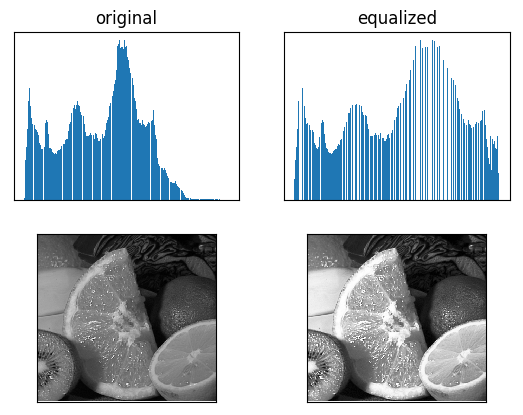

In [10]:
# Histogram equalization
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Here 0 means reading in grayscale image
img = cv2.imread('data/fruits.bmp',0) 
plt.subplot(2,2,1)
plt.hist(img.flatten(),256); 
plt.title("original")
plt.xticks([])
plt.yticks([])

img_equ = cv2.equalizeHist(img) 
plt.subplot(2,2,2)
plt.hist(img_equ.ravel(),bins=256)
plt.title("equalized")
plt.xticks([])
plt.yticks([])

images = [img,img_equ]
for i in range(2):
    plt.subplot(2,2,i+3)
    plt.imshow(images[i],"gray")
    plt.xticks([])
    plt.yticks([])

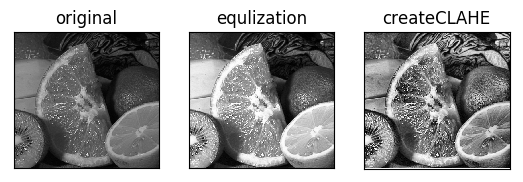

In [5]:
# Adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(7,7)) 
img_clahe = clahe.apply(img)
images = [img,img_equ,img_clahe]
title=['original','equlization','createCLAHE']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])


## Histogram specification
* The defect of histogram equalization: it cannot be used for interactive image enhancement applications, because histogram equalization can only produce one result
* Histogram specification can just solve the above problem. It can transform the histogram of the original image into the shape of the desired histogram.
* Code reference: [Histogram matching]（ https://zhuanlan.zhihu.com/p/323220279 )

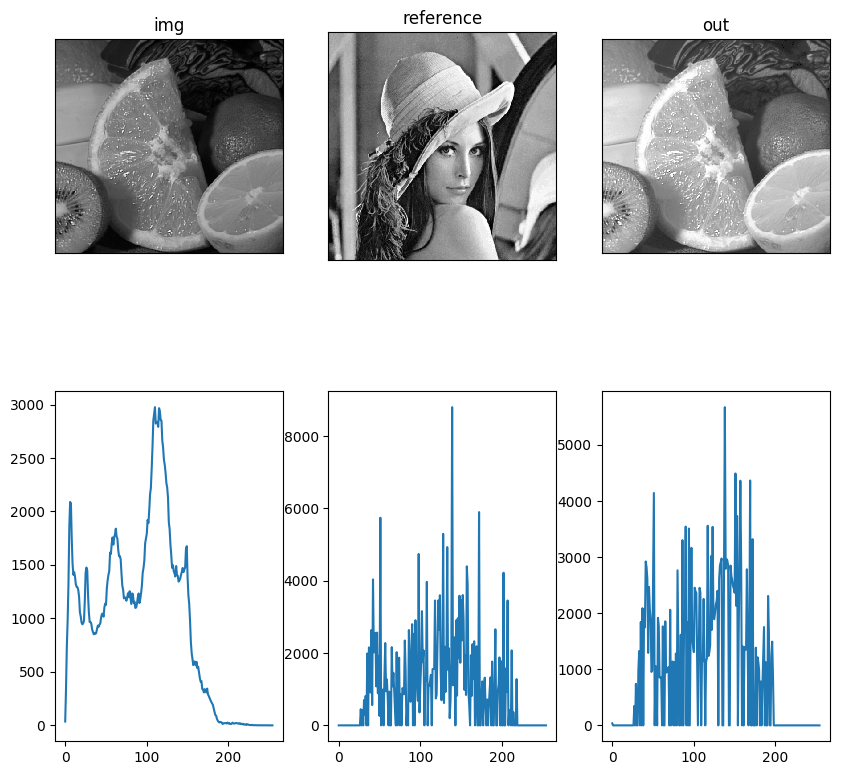

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/fruits.bmp')
ref = cv2.imread('data/lenna.bmp')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ref_gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
hist_img = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
hist_ref = cv2.calcHist([ref_gray], [0], None, [256], [0, 256])
# Calculate cumulative histogram
out = np.zeros_like(img_gray)
tmp_ref = 0.0
h_ref = hist_ref.copy()

h_ref=np.cumsum(h_ref)
h_acc=np.cumsum(hist_img)

# for i in range(256):
#     tmp_ref += h_ref[i]
#     h_ref[i] = tmp_ref
# tmp = 0.0
# h_acc = hist.copy()
# for i in range(256):
#     tmp += hist[i]
#     h_acc[i] = tmp

# find mapping
diff = np.zeros([256, 256])
for i in range(256):
    for j in range(256):
        diff[i][j] = np.fabs(h_ref[j] - h_acc[i])
M = np.zeros(256)
for i in range(256):
    index = 0
    min = diff[i][0]  # min = 1.
    for j in range(256):
        if (diff[i][j] < min):
            min = diff[i][j]
            index = int(j)
    M[i] = index
out = M[img_gray].astype(np.float32)

hist_img = cv2.calcHist([img_gray], [0], None, [255], [0, 255])
hist_ref = cv2.calcHist([ref_gray], [0], None, [255], [0, 255])
hist_out = cv2.calcHist([out], [0], None, [255], [0, 255])
title=['img','reference','out']
images=[img_gray,ref_gray,out,hist_img,hist_ref,hist_out]
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])
for i in range(3):
    plt.subplot(2,3,4+i)
    plt.plot(images[i+3])


## exercise1
* Please enhance the image 'phobos.tif'.
* Experience the difference between the Histogram equalization and Adaptive histogram equalization method.

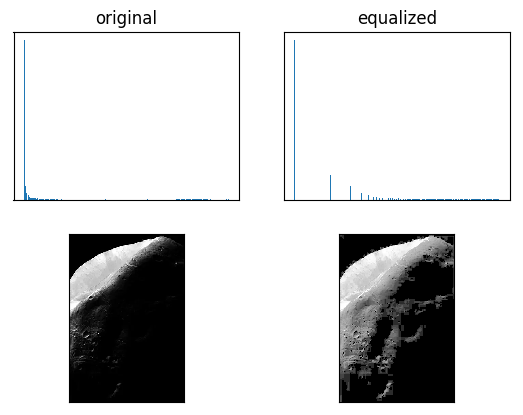

In [9]:
##### coding here......

# Histogram equalization
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Here 0 means reading in grayscale image
img = cv2.imread('data/phobos.tif',0) 
plt.subplot(2,2,1)
plt.hist(img.flatten(),256); 
plt.title("original")
plt.xticks([])
plt.yticks([])

img_equ = cv2.equalizeHist(img) 
plt.subplot(2,2,2)
plt.hist(img_equ.ravel(),bins=256)
plt.title("equalized")
plt.xticks([])
plt.yticks([])

images = [img,img_equ]
for i in range(2):
    plt.subplot(2,2,i+3)
    plt.imshow(images[i],"gray")
    plt.xticks([])
    plt.yticks([])

# # 均衡化直方图
# 在全局上进行拉伸，使其分布较为均匀
# # 局部自适应直方图均衡化
# 在每一个grid上均衡化，局部进行拉伸，会有更好的对比度


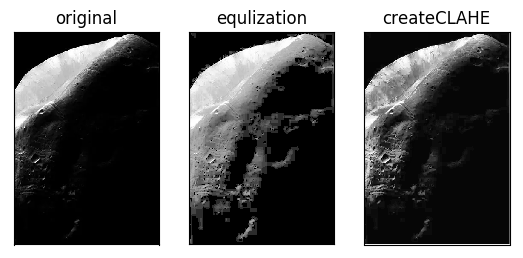

In [11]:

# Adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(7,7)) 
img_clahe = clahe.apply(img)
images = [img,img_equ,img_clahe]
title=['original','equlization','createCLAHE']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])

# Spatial smoothing filter

* Smoothing filter can achieve the purpose of image blurring, which is very helpful for noise removal.
* OpenCV Functions: ```cv2. blur() ````,``` cv2. GaussianBlur() ```, ```cv2. medianBlur() ```,```cv2. bilateralFilter()```

* Low pass filter allows low-frequency pass through. In the image, edges and noise are high-frequency parts, so the low-pass filter is used to remove noise, smooth and blur the image; On the contrary, high pass filter is used to enhance image edges for sharpening.

> Common noise model include salt and pepper noise, Gaussian noise. Salt and pepper noise can be understood as black dots or white dots randomly appearing in the image; Gaussian noise can be understood as noise caused by illumination and other reasons when taking pictures.

## Mean filter

* It is a normalized convolution box. It just uses the average value of all pixels in the area covered by the convolution box to replace the central element. You can use functions' ```cv2. blur() '````and'```cv2. boxFilter()``` to complete this task. The following is a 3x3 normalized convolution box

 $ kernel=\frac{1}{9}\left[1,1,1;1,1,1;1,1,1\right]$：


* Note: If you do not want to use the normalized convolution box, you should use cv2. boxFilter(). In this case, the parameter ```normalize=False```should be passed in.



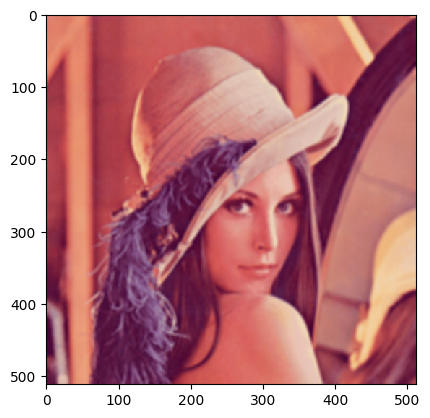

In [12]:
img = cv2.imread('data/lenna.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.blur(img, (5, 5))  # Mean filter
plt.imshow(blur)

## Gaussian filter

* Transform the convolution kernel into a Gaussian kernel (the values in the box now conform to the Gaussian distribution. The value in the center of the box is the largest, and the rest of the boxes form a Gaussian hill according to the decreasing distance from the central element. The original average number is now the weighted average number).

* The function is ```cv2. GaussianBlur (img, ksize, sigmaX)```c.
``
  * The larger the parameter sigmaX value is, the more obvious the blurring effect is. Gaussian filtering is slower than mean filtering, but it can effectively remove Gaussian noise and retain more image details, so it is often called the most useful filter.

  * We need to specify the width and height of the Gaussian kernel (must be odd), and the standard deviation of the Gaussian function along the X and Y directions. If we only specify the standard deviation of the X direction, the Y direction will also take the same value; If both standard deviations are 0, the function will calculate itself according to the size of the kernel.

* Gaussian filter can effectively remove Gaussian noise from image.

* You can also use the function ``` cv2. getGaussianKernel()```  to build a Gaussian kernel yourself.


In [13]:
def gasuss_noise(image, mu=0.0, sigma=0.2):
    """
     Gaussian noise generating function
    :param image: imput image
    :param mu: averaging
    :param sigma: standerd deviatioin
    :return: out put image with Gaussian noise
    """
    image = np.array(image / 255, dtype=float)
    noise = np.random.normal(mu, sigma, image.shape)
    gauss_noise = image + noise
    if gauss_noise.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    gauss_noise = np.clip(gauss_noise, low_clip, 1.0)
    gauss_noise = np.uint8(gauss_noise * 255)
    return gauss_noise

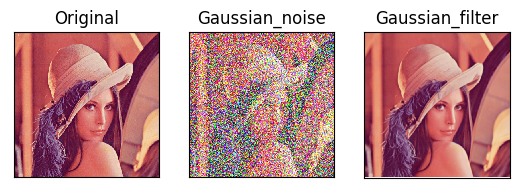

In [14]:
img = cv2.imread('data/lenna.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Add Gaussian noise
img_noise=gasuss_noise(img,sigma=0.3)
# 0 refers to the standard deviation of Gaussian function calculated according to the window size (5,5)
img_gaussian= cv2.GaussianBlur(img,(5,5),0)
images=[img,img_noise,img_gaussian]
title=['Original','Gaussian_noise','Gaussian_filter']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])

## Median filter

* The median is the middle value of all numbers after sorting. Median filtering is to replace the pixel value with the median value in the region. Therefore, isolated dots, such as 0 or 255, can be easily eliminated, and are suitable for removing salt and pepper noise and speckle noise.

* Median is a nonlinear operation, and its efficiency is slower than linear filters.

* The size of the convolution kernel should also be an odd number.

In [15]:
import random
def sp_noise(image,rate=0.05):
    '''
    generate salt and pepper noise
    rate:Noise ratio
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - rate
    for i in range(image.shape[0]):
        for j in range(image.shape[1]): 
            rdn = random.random()
            if rdn < rate:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

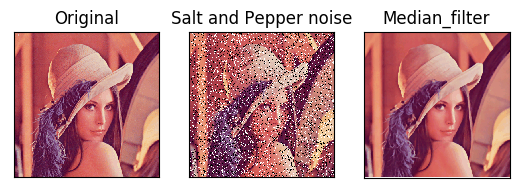

In [16]:
img = cv2.imread('data/lenna.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# add salt and pepper noise
img_noise=sp_noise(img,0.09)
img_median = cv2.medianBlur(img,5)
images=[img,img_noise,img_median]
title=['Original','Salt and Pepper noise','Median_filter']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])

# Spatial sharpening filter

* The smoothing processing introduced by mean smoothing, Gaussian smoothing, median smoothing and bilateral smoothing can be regarded as the "low-pass filtering", which will filter out the "high-frequency" , making the image look smoother; The image gradient can be regarded as "high-pass filtering", which will filter out the "low-frequency" part of the image in order to highlight the abrupt part of the image.

* The convolution operators for calculating the gray level change include Roberts operator, Prewitt operator, Sobel operator, Scharr operator, Kirsch operator, Robinson operator and Laplacian operator.

* The functions used here are: ```cv2.Sobel()```，```cv2.Schar()```，```cv2.Laplacian()``` -- Scharr is the optimization of Sobel (when using small convolution kernels to solve gradient angles); Laplacian is the second derivative.

* Reference: [Roberts, Prewitt, Sobel edge detection operator]（ https://zhuanlan.zhihu.com/p/506408180 )




## Sobel operator

*Sobel operator is the combination of Gaussian smoothing and differential operation, so its anti noise ability is very good. Sobel 3 × The kernel size of 3 is as follows:

$sobel=$
     ![](https://ai-studio-static-online.cdn.bcebos.com/232122c9f38849e2bf6020cb957893f867cbf2be64664420a75e66845d0732b5)
     


* ```dst=cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])```



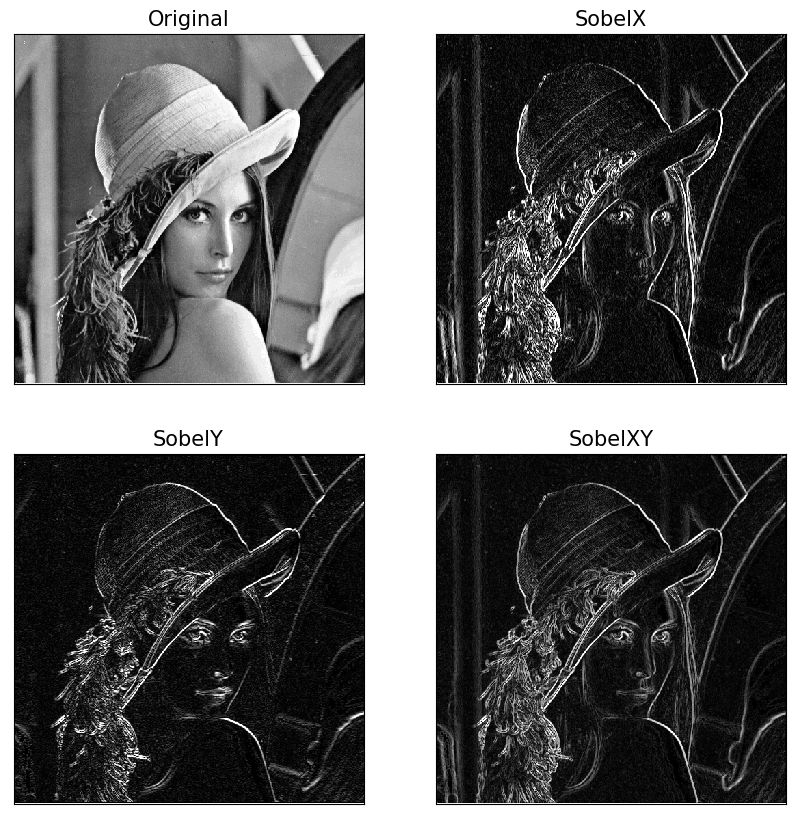

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_gray=cv2.imread("data/lenna.bmp",0)

# Parameter 1,0 means to calculate the first derivative only in the x direction
sobelx=cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=3)

# Parameter 0,1 means to calculate the first derivative only in the y direction
sobely=cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=3)

# Convert the original image to uint8 type
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)

#grad=|grad_x|+|grad_y|
sobelxy = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

images=[img_gray,abs_grad_x,abs_grad_y,sobelxy]
title=['Original','SobelX','SobelY','SobelXY']
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i],size=15)
    plt.xticks([])
    plt.yticks([])

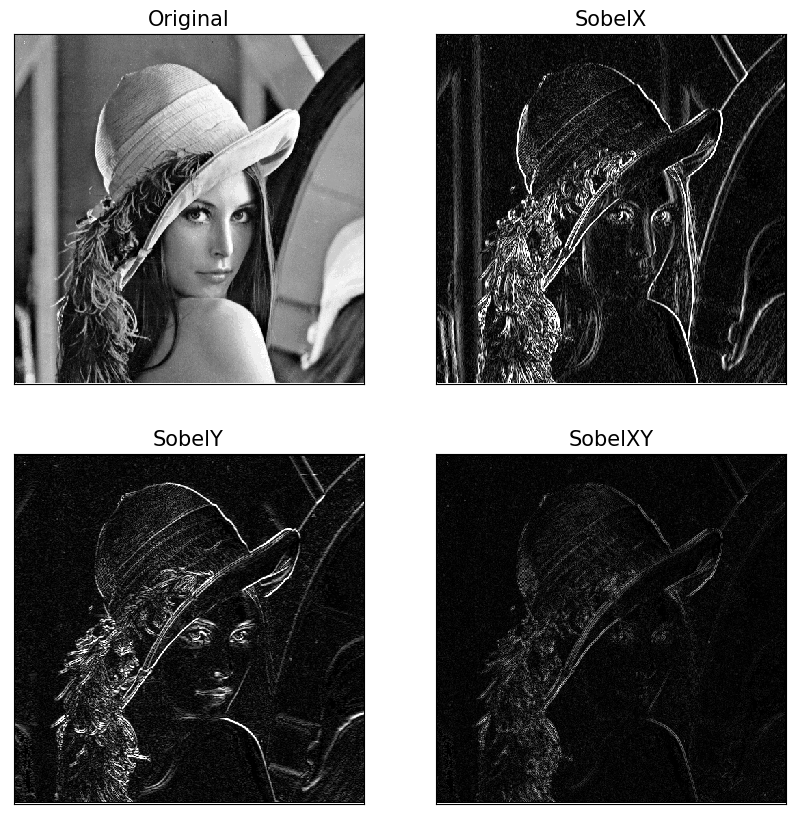

In [3]:
#如果dx和dy同时设置为1
#grad_x_y = cv2.Sobel(img_src, cv2.CV_16S, 1, 1, ksize=3)
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_gray=cv2.imread("data/lenna.bmp",0)

#cv2.CV_64F 输出图像的深度（cv2.CV_64F是数据类型），可以使用-1, 与原图像保持一致
# 参数 1,0 为只在 x 方向求一阶导数
sobelx=cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=3)

# 参数 0,1 为只在 y 方向求一阶导数
sobely=cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=3)

#dx和dy同时设置为1
sobelxy=cv2.Sobel(img_gray,cv2.CV_64F,1,1,ksize=3)

#实现将原图片转换为uint8类型
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)
abs_grad_xy=cv2.convertScaleAbs(sobelxy)
images=[img_gray,abs_grad_x,abs_grad_y,abs_grad_xy]
title=['Original','SobelX','SobelY','SobelXY']
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i],size=15)
    plt.xticks([])
    plt.yticks([])

> * Tips
> * From the results, we can see that when dx and dy are simultaneously set to 1, the gradients of the horizontal and vertical lines in the image disappear. Here, dx and dy are both 1, indicating the relationship is 'and'. Only when gradients in both x and y directions can they be detected.

## Laplacian operator
* Laplacian transformation is to calculate the second derivative of an image. The following figure shows two kinds of kernel:
![](https://ai-studio-static-online.cdn.bcebos.com/6480b9cfc0c8492099a0fee1431e985b6d5ca126beed43a6858c0cbf578b78e9 )

*```dst = cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])``` -- If ksize is 1, it is still a 3 × 3 kernel


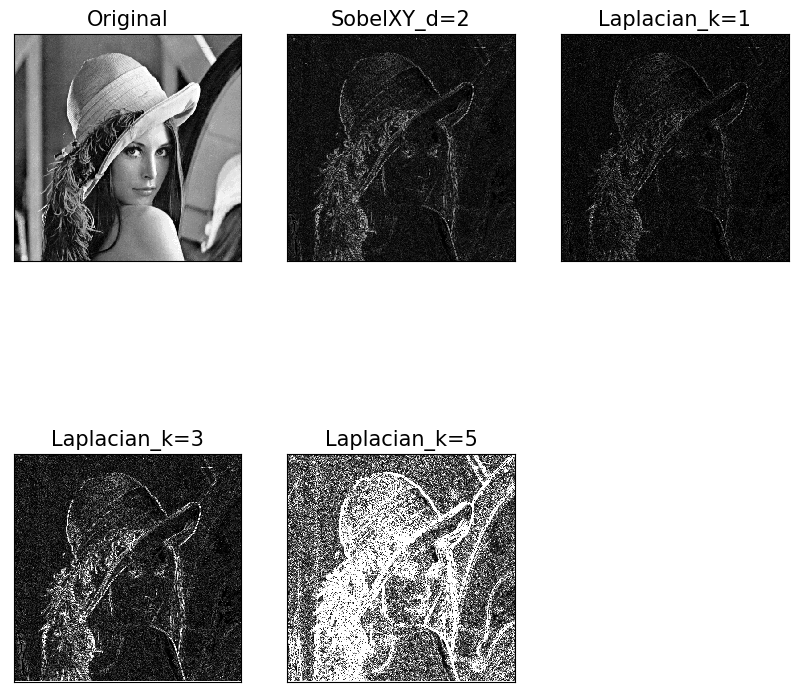

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_gray=cv2.imread("data/lenna.bmp",0)
#Laplacian
# kernel size is 1，3，5
laplacian1=cv2.Laplacian(img_gray,cv2.CV_64F,ksize=1)
laplacian3=cv2.Laplacian(img_gray,cv2.CV_64F,ksize=3)
laplacian5=cv2.Laplacian(img_gray,cv2.CV_64F,ksize=5)

# Convert the image to uint8 type
abs_grad_1 = cv2.convertScaleAbs(laplacian1)
abs_grad_3 = cv2.convertScaleAbs(laplacian3)
abs_grad_5 = cv2.convertScaleAbs(laplacian5)

# Sobel
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 2, 0, ksize=3)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 2, ksize=3)
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
images=[img_gray,sobelxy,abs_grad_1,abs_grad_3,abs_grad_5]
title=['Original','SobelXY_d=2','Laplacian_k=1','Laplacian_k=3','Laplacian_k=5']
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i],size=15)
    plt.xticks([])
    plt.yticks([])


> * 从运行结果可以看到Laplacian()中ksize越大，梯度信息越丰富，这点和Sobel变换是一样的。另外在相同的ksize时，二阶Sobel变换和Laplacian变换对比看，Laplacian变换取得的梯度信息要更明显一些。

## exercise2
* There is a white circle on the black background. If you want to make the circle thiner, which filter is more useful?

> * Median Filter? Max Filter? Min Filter? Mean Filter?

![](https://ai-studio-static-online.cdn.bcebos.com/710f398321bb4d008a477857cba69ab0336853713030491fba9e153f23db80b1)





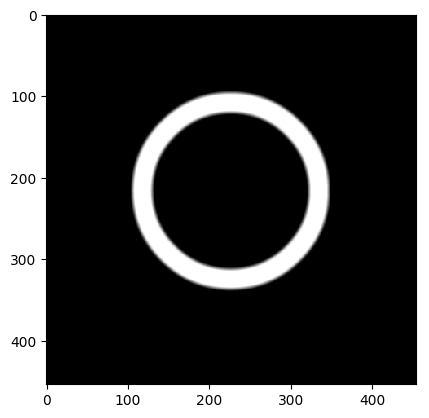

In [30]:
##### coding here......

 # Mean filter
img = cv2.imread('data/wingding-circle-empty.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.blur(img, (5,5))  # Mean filter
plt.imshow(blur)





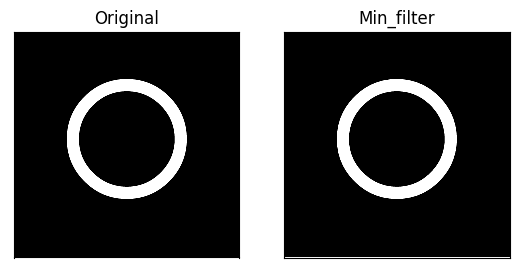

In [26]:
# Median Filter
import random
def sp_noise(image,rate=0.05):
    '''
    generate salt and pepper noise
    rate:Noise ratio
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - rate
    for i in range(image.shape[0]):
        for j in range(image.shape[1]): 
            rdn = random.random()
            if rdn < rate:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output



img = cv2.imread('data/wingding-circle-empty.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# add salt and pepper noise
#img_noise=sp_noise(img,0.09)
img_median = cv2.medianBlur(img,15)
images=[img,img_median]
title=['Original',' Median_filter']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i])
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])   

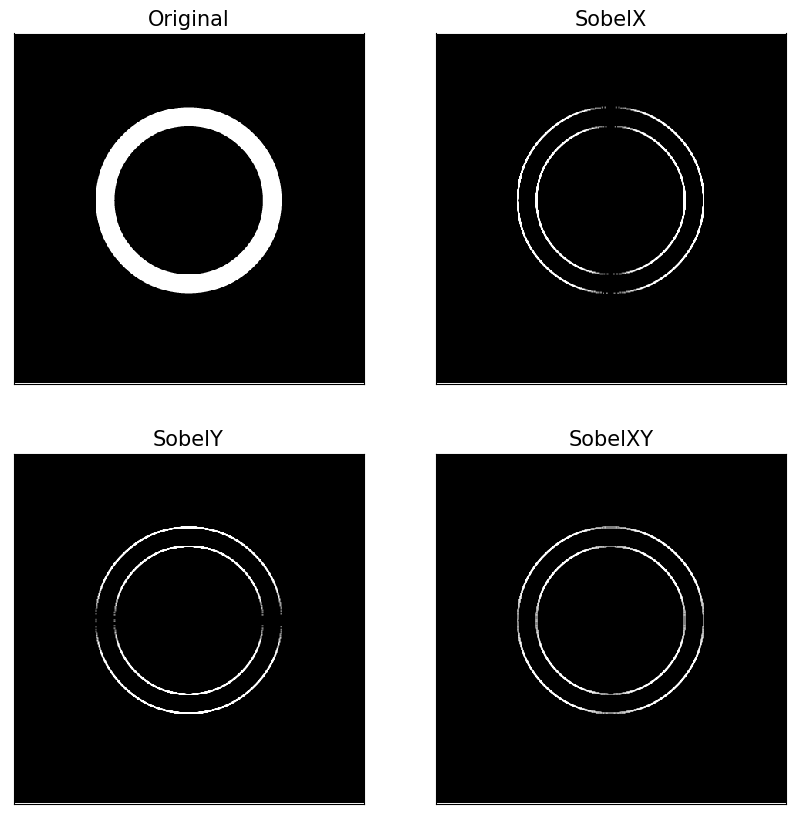

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_gray=cv2.imread("data/wingding-circle-empty.jpg",0)

# Parameter 1,0 means to calculate the first derivative only in the x direction
sobelx=cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=3)

# Parameter 0,1 means to calculate the first derivative only in the y direction
sobely=cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=3)

# Convert the original image to uint8 type
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)

#grad=|grad_x|+|grad_y|
sobelxy = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

images=[img_gray,abs_grad_x,abs_grad_y,sobelxy]
title=['Original','SobelX','SobelY','SobelXY']
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i],size=15)
    plt.xticks([])
    plt.yticks([])

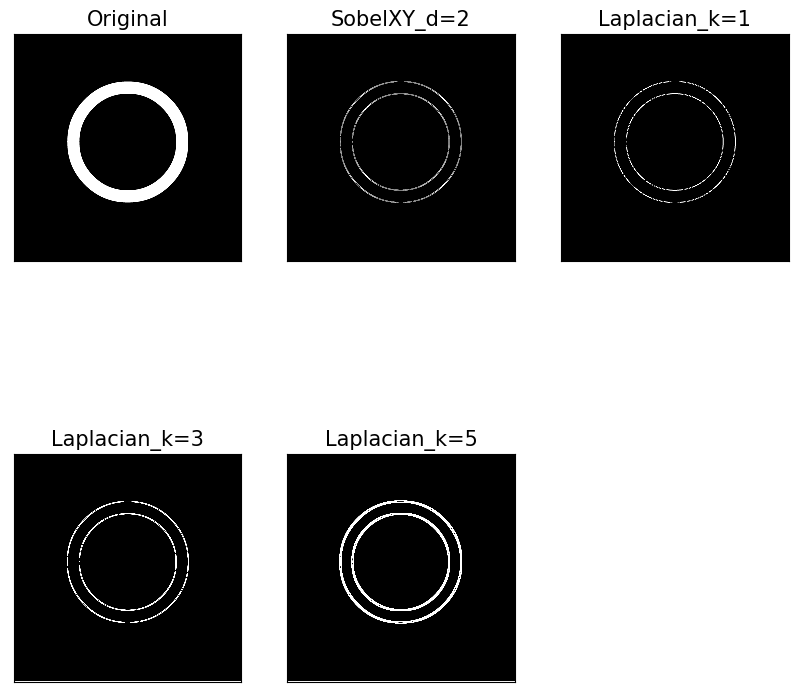

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_gray=cv2.imread("data/wingding-circle-empty.jpg",0)
#Laplacian
# kernel size is 1，3，5
laplacian1=cv2.Laplacian(img_gray,cv2.CV_64F,ksize=1)
laplacian3=cv2.Laplacian(img_gray,cv2.CV_64F,ksize=3)
laplacian5=cv2.Laplacian(img_gray,cv2.CV_64F,ksize=5)

# Convert the image to uint8 type
abs_grad_1 = cv2.convertScaleAbs(laplacian1)
abs_grad_3 = cv2.convertScaleAbs(laplacian3)
abs_grad_5 = cv2.convertScaleAbs(laplacian5)

# Sobel
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 2, 0, ksize=3)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 2, ksize=3)
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
images=[img_gray,sobelxy,abs_grad_1,abs_grad_3,abs_grad_5]
title=['Original','SobelXY_d=2','Laplacian_k=1','Laplacian_k=3','Laplacian_k=5']
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(title[i],size=15)
    plt.xticks([])
    plt.yticks([])

In [1]:
import cv2
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import copy

img_gray=cv2.imread("data/wingding-circle-empty.jpg",0)

# dark_image = np.array(Image.open("data/wingding-circle-empty.jpg").resize((500,700),Image.ANTIALIAS))
# gama_image = (dark_image.astype(np.float32)/255)**0.25

# def max_box(image):
#     mean_image = np.zeros(shape=image.shape, dtype=np.float32)
#     for i in range(image.shape[0]):
#         for j in range(image.shape[1]):
#             for k in range(image.shape[2]):
#                 mean_image[i][j][k]=np.max(image[i:i+3,j:j+3,k])

#     return mean_image


# plt.figure(figsize=(10,10))
# plt.subplot(1,3,1)
# plt.imshow(dark_image/255,"gray")
# plt.subplot(1,3,2)
# plt.imshow(gama_image,"gray")
# mean_image=max_box(gama_image)
# plt.subplot(1,3,3)
# plt.imshow(mean_imag,"gray")
# plt.show()

def original(i, j, k, ksize, img):
    x1 = y1 = -ksize // 2
    x2 = y2 = ksize + x1
    temp = np.zeros(ksize * ksize)
    count = 0
    for m in range(x1, x2):
        for n in range(y1, y2):
            if i + m < 0 or i + m > img.shape[0] - 1 or j + n < 0 or j + n > img.shape[1] - 1:
                temp[count] = img[i, j, k]
            else:
                temp[count] = img[i + m, j + n, k]
            count += 1
    return temp


def max_min_functin(ksize, img, flag):
    img0 = copy.copy(img)
    for i in range(0, img.shape[0]):
        for j in range(2, img.shape[1]):
            for k in range(img.shape[2]):
                temp = original(i, j, k, ksize, img0)
                if flag == 0:  #最大值
                    img[i, j, k] = np.max(temp)
                elif flag == 1:#最小值
                    img[i, j, k] = np.min(temp)
    return img

img_original = (1,1,1,5,img_gray)

# img_min = max_min_functin(5,img_gray,0)
plt.subplot(1,2,1)
plt.imshow(img_gray,"gray")
plt.subplot(1,2,2)
plt.imshow(img_original)



/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1366: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data cannot be converted to float

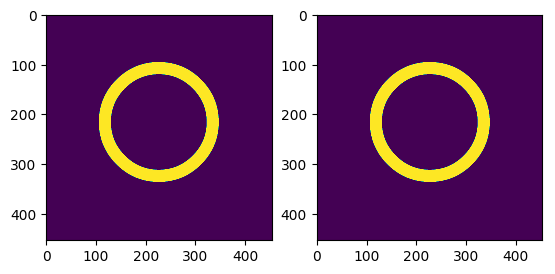

In [3]:
import cv2 as cv
from PIL import Image
# import numpy as np

from matplotlib import pyplot as plt


img = cv.imread('data/wingding-circle-empty.jpg',0)  # 我的桌面上有个1.jpg
res = cv.medianBlur(img, 5)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(res)
# cv.waitKey(0)


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [1]:
import cv2 as cv
import numpy as np
import copy

def original(i, j, k, ksize, img):
    # 找到矩阵坐标
    x1 = y1 = -ksize // 2
    x2 = y2 = ksize + x1
    temp = np.zeros(ksize * ksize)
    count = 0
    # 处理图像
    for m in range(x1, x2):
        for n in range(y1, y2):
            if i + m < 0 or i + m > img.shape[0] - 1 or j + n < 0 or j + n > img.shape[1] - 1:
                temp[count] = img[i, j, k]
            else:
                temp[count] = img[i + m, j + n, k]
            count += 1
    return temp

# 自定义最大值滤波器最小值滤波器
def max_min_functin(ksize, img, flag):
    img0 = copy.copy(img)
    for i in range(0, img.shape[0]):
        for j in range(2, img.shape[1]):
            for k in range(img.shape[2]):
                temp = original(i, j, k, ksize, img0)
                if flag == 0:
                    img[i, j, k] = np.max(temp)
                elif flag == 1:
                    img[i, j, k] = np.min(temp)
    return img

img = cv.imread('data/wingding-circle-empty.jpg',0)
min_img = max_min_functin(3, copy.copy(img),1)
max_img = max_min_functin(3, copy.copy(img),0)

plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(min_img)
plt.subplot(1,3,3)
plt.imshow(max_img)

#cv.waitKey(0)


# img = cv.imread('data/wingding-circle-empty.jpg',0)  # 我的桌面上有个1.jpg
# res = cv.medianBlur(img, 5)
# plt.subplot(1,2,1)
# plt.imshow(img)
# plt.subplot(1,2,2)
# plt.imshow(res)
# cv.waitKey(0)

IndexError: tuple index out of range

In [ ]:
import cv2 as cv
import numpy as np
import copy

def original(i, j, k, ksize, img):
    # 找到矩阵坐标
    x1 = y1 = -ksize // 2
    x2 = y2 = ksize + x1
    temp = np.zeros(ksize * ksize)
    count = 0
    # 处理图像
    for m in range(x1, x2):
        for n in range(y1, y2):
            if i + m < 0 or i + m > img.shape[0] - 1 or j + n < 0 or j + n > img.shape[1] - 1:
                temp[count] = img[i, j, k]
            else:
                temp[count] = img[i + m, j + n, k]
            count += 1
    return temp

# 自定义最大值滤波器最小值滤波器
def max_min_functin(ksize, img, flag):
    img0 = copy.copy(img)
    for i in range(0, img.shape[0]):
        for j in range(2, img.shape[1]):
            for k in range(img.shape[2]):
                temp = original(i, j, k, ksize, img0)
                if flag == 0:
                    img[i, j, k] = np.max(temp)
                elif flag == 1:
                    img[i, j, k] = np.min(temp)
    return img

img = cv.imread('data/wingding-circle-empty.jpg')
min_img = max_min_functin(3, copy.copy(img),1)
max_img = max_min_functin(3, copy.copy(img),0)
cv.imshow("original", img)
cv.imshow("min_img", min_img)
cv.imshow("max_img", max_img)
cv.waitKey(0)
